In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
models = [
    'small_patience_10',
    'small',
    'medium',
    'small_default_size',
    'small_padd_to_square',
    'small_10e_default_imgsz_padd_to_square',
    'small_10e_default_imgsz_padd_to_square_no_additional_augment'
]

In [59]:
def path_to_res_csv(m :str) -> str:
    if m == 'small_patience_10':
        m = 'small_batch2_epoch300_patience10'
    if m == 'small_padd_to_square':
        m = 'small_no_rect'
    return f"{m}/train/results.csv"

In [60]:
models_results = { m : pd.read_csv(path_to_res_csv(m)) for m in models }

In [61]:
merged_map_at_50to95 = pd.DataFrame({model : df['    metrics/mAP50-95(B)'] for model, df in models_results.items()})
merged_map_at_50to95

,small_patience_10,small,medium,small_default_size,small_padd_to_square,small_10e_default_imgsz_padd_to_square,small_10e_default_imgsz_padd_to_square_no_additional_augment
0,0.04952,0.08235,0.05575,0.05026,0.08884,0.14448,0.09824
1,0.06577,0.07089,0.04327,0.06081,0.08884,0.06855,0.12683
2,0.07420,0.07232,0.01605,0.05012,0.14212,0.09828,0.19675
3,0.11628,0.07079,0.06629,0.07101,0.14593,0.11853,0.16396
4,0.08748,0.07868,0.06939,0.07372,0.15144,0.17196,0.15087
...,...,...,...,...,...,...,...
135,NaN,0.39791,NaN,NaN,NaN,NaN,NaN
136,NaN,0.39818,NaN,NaN,NaN,NaN,NaN
137,NaN,0.40831,NaN,NaN,NaN,NaN,NaN
138,NaN,0.39911,NaN,NaN,NaN,NaN,NaN


In [62]:

merged_smoothed = merged_map_at_50to95.rolling(20).mean()
merged_smoothed

,small_patience_10,small,medium,small_default_size,small_padd_to_square,small_10e_default_imgsz_padd_to_square,small_10e_default_imgsz_padd_to_square_no_additional_augment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
135,NaN,0.396944,NaN,NaN,NaN,NaN,NaN
136,NaN,0.397600,NaN,NaN,NaN,NaN,NaN
137,NaN,0.398449,NaN,NaN,NaN,NaN,NaN
138,NaN,0.397883,NaN,NaN,NaN,NaN,NaN


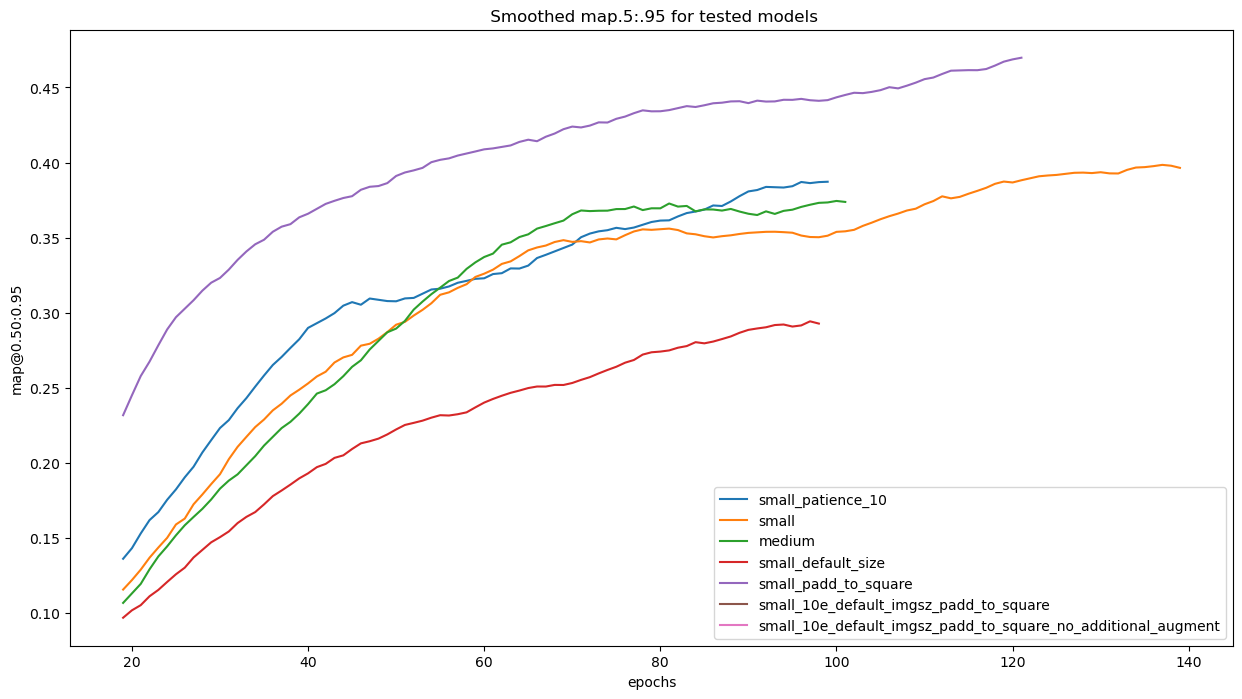

In [63]:
plt.figure(figsize=(15,8))
plt.plot(merged_smoothed, label=merged_smoothed.columns.values)
plt.xlabel('epochs')
plt.ylabel('map@0.50:0.95')
plt.title(' Smoothed map.5:.95 for tested models')
plt.legend()
